# Covid-19 Turkey Analysis

In this notebook I will do a brief analysis of Covid-19 situation in Turkey. We will import the data and get it ready to be analysed. Then we will do some visualization to get a better idea about what is going on in Turkey in April 2021. I will use two dataset. One of them contains data from all countries in the World. We'll get Turkey data from this dataset to make an analysis on total cases, deaths and test numbers. We'll also get to see if vaccines actually works. Second dataset contains informations on Turkey2s cities. You will see which city is safe to travel and which is dangerous. So let's start.

## Import the Data

In [31]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8

import plotly.offline as py
from plotly.offline import init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

Let's import our data 
-->https://ourworldindata.org/coronavirus/country/turkey

In [2]:
df = pd.read_csv(r'C:\Users\oguzh\Downloads\owid-covid-data.csv')
df.head(9)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511



# Data Wrangling





As you can see we have data from all over the World. But we just need the data of Turkey. We will import that than reset the index. In other step we have to eliminate NaN values and replace them with 0. fillna() function will get the job done.



In [3]:
dft=df[df['location']=='Turkey']
dft.reset_index(drop=True, inplace=True)
dft.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,TUR,Asia,Turkey,2020-03-11,1.0,1.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
1,TUR,Asia,Turkey,2020-03-12,1.0,0.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
2,TUR,Asia,Turkey,2020-03-13,5.0,4.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
3,TUR,Asia,Turkey,2020-03-14,5.0,0.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82
4,TUR,Asia,Turkey,2020-03-15,6.0,1.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.82


In [4]:
dft= dft.fillna(0)
dft.head(9)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,TUR,Asia,Turkey,2020-03-11,1.0,1.0,0.000,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
1,TUR,Asia,Turkey,2020-03-12,1.0,0.0,0.000,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
2,TUR,Asia,Turkey,2020-03-13,5.0,4.0,0.000,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
3,TUR,Asia,Turkey,2020-03-14,5.0,0.0,0.000,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
4,TUR,Asia,Turkey,2020-03-15,6.0,1.0,0.000,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
5,TUR,Asia,Turkey,2020-03-16,18.0,12.0,2.571,0.0,0.0,0.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
6,TUR,Asia,Turkey,2020-03-17,47.0,29.0,6.714,1.0,1.0,0.143,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
7,TUR,Asia,Turkey,2020-03-18,98.0,51.0,13.857,1.0,0.0,0.143,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82
8,TUR,Asia,Turkey,2020-03-19,192.0,94.0,27.286,3.0,2.0,0.429,...,25129.341,0.2,171.285,12.13,14.1,41.1,0.0,2.81,77.69,0.82


In [5]:
dft.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

#### Now that's a lot of columns
Although these columns contains very useful information, most of these columns are useless to us. We just need the data for useful to us to analyse Turkey. But you can use them if you want to analyse Covid-19 Worldwide.   

In [6]:
dft=dft[['date','total_cases','new_cases','total_deaths','new_deaths','new_tests',
         'total_tests','people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index']]
dft.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests', 'total_tests', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations', 'stringency_index'],
      dtype='object')

# Explatory Data Analysis and Data Visualization

First one includes number of tests ,cases and deaths. Half of the population tested from beginning of the pandemic. And you can see death is very low if we compare it to number of cases. We'll visualized that in the second plot.

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dft['date'], y = dft['total_tests'],mode = 'lines+markers',name = 'Tests', line =dict(color = 'Green', width = 4)))
fig.add_trace(go.Scatter(x = dft['date'], y = dft['total_cases'],mode = 'lines+markers',name = 'Cases', line =dict(color = 'Orange', width = 4)))
fig.add_trace(go.Scatter(x = dft['date'], y = dft['total_deaths'],mode = 'lines+markers',name = 'Deaths', line =dict(color = 'Red', width = 4)))
fig.show()

In [8]:
tem = dft.groupby('date')['total_cases','total_deaths'].sum().reset_index()
tem = tem[tem['date'] == max(tem['date'])].reset_index(drop =True)

tm = tem.melt(id_vars = 'date', value_vars = ['total_cases','total_deaths'])
fig = px.treemap(tm, path = ['variable'], values= 'value', height = 250, width = 1000 )

fig.data[0].textinfo = 'label+text+value'
fig.show()


<ipython-input-8-4ee906d6cd59>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Third Wave , Precautions and More

Turkey is on the third way. And it's worse than ever. Let's find out why . To do that we will examine Stringency Index. 

**Stringency Index** = Stringency Index created by Oxford University shows how strict a country’s measures were, and at what stage of the pandemic spread it enforced these. Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency. %100 Stringency Index means full lockdown.

If you look at plots in below, you will see cases rises exponentially and Stringency Index is about %80. We can say it is a high index but still it doesn't work the way it should work. People must be more carefull but still if you know Turkey a bit you know why it is not working. 

In [9]:
fig = go.Figure([go.Scatter(x=dft['date'], y=dft['new_cases'])])
fig.update_layout(title='Confirmed New Cases Everyday in Turkey')
fig.show()


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dft['date'], y = dft['stringency_index'],mode = 'lines',name = 'Deaths', line =dict(color = 'Red', width = 4)))
fig.show()

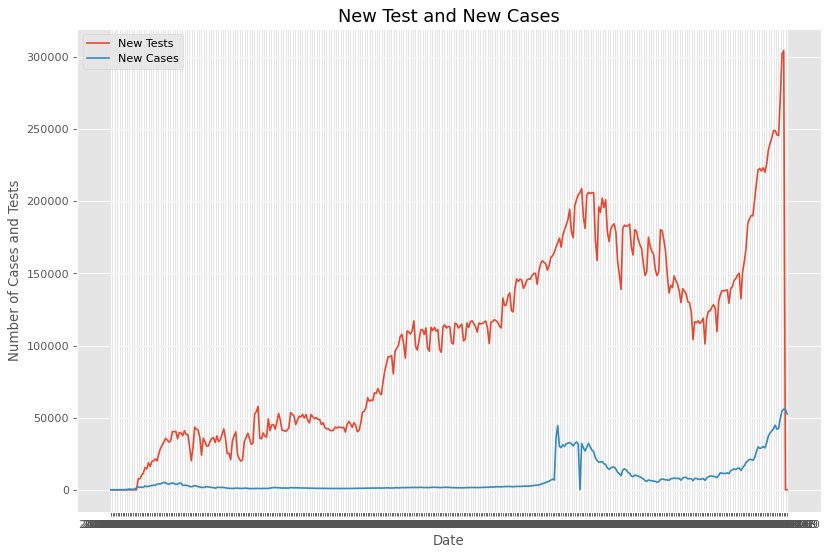

In [11]:

plt.figure(figsize=(12,8), dpi=80)
plt.plot(dft['date'],dft['new_tests'])
plt.plot(dft['date'],dft['new_cases'])
plt.legend(['New Tests','New Cases'], loc='upper left')
plt.xlabel('Date', size=12)
plt.ylabel('Number of Cases and Tests', size=12)
plt.title('New Test and New Cases', size = 16)
plt.show()

## Vaccine Factor
First vaccination in Turkey was at January 15th. Let's create a new dataframe to set a ratio. This will help us understand if vaccines really work. 

First plot shows our Case/Death Ratio. Now if you look halfway around January, you can see our ratio is actually falling. 
Let's support these thesis on the second plot. Vaccination procedures started on February, and people started to get vaccinated. As the number grows our Case/Death ratio is actually falling. 

**Note**= March 28th was on Sunday, nobody got vaccinated. 

In [12]:
dft['new_death/new_case']= dft['new_deaths']/dft['new_cases']
dft['new_death/new_case']


fig = px.line(dft, x='date', y= 'new_death/new_case')
fig.update_xaxes(mirror='ticks')
fig.update_layout(title='Case/Death Ratio')
fig.show()


In [13]:
dft[['new_death/new_case','people_vaccinated']].corr()

,new_death/new_case,people_vaccinated
new_death/new_case,1.000000,-0.520722
people_vaccinated,-0.520722,1.000000


In [14]:
fig = px.line(dft, x='date', y= 'people_vaccinated', range_x=['2021-01-15','2021-04-15'])
fig.update_xaxes(mirror='ticks')
fig.update_layout(title='People Vaccinated')
fig.show()

In [15]:
fig = px.line(dft, x='date', y= 'new_death/new_case', range_x=['2021-01-15','2021-04-15'])
fig.update_xaxes(mirror='ticks')
fig.update_layout(title='Death/Case Ratio')
fig.show()

# Covid-19 Analysis on Cities of Turkey

You can get the data from Minister of Health's website. Let's first get rid off the columns that are unnecessary. Then conver column names to English. Also we'll study on the latest data possible. Then convert the 'Weekly' column to float, which was an object. We are ready visualize !

In [16]:
df = pd.read_csv(r'C:\Users\oguzh\Downloads\weekly_covid.csv')
df.head(9)

,Unnamed: 0,Aciklamalar,tarih_baslangic,tarih_bitis,il,100bin_kiside_haftalik_vaka_sayisi
0,0.0,Son Güncelleme,08.02.2021,14.02.2021,Adana,"59,95"
1,NaN,9 Nisan 2021 Cuma,08.02.2021,14.02.2021,Adıyaman,"100,55"
2,1.0,Veri Seti,08.02.2021,14.02.2021,Afyon,"22,32"
3,NaN,Türkiye İl Düzeyi Haftalık Vaka Sayıları,08.02.2021,14.02.2021,Ağrı,"27,50"
4,2.0,Kapsam,08.02.2021,14.02.2021,Aksaray,"92,01"
5,NaN,"Bu veri seti, Sağlık Bakanlığı tarafından yayı...",08.02.2021,14.02.2021,Amasya,"96,06"
6,3.0,Kaynak,08.02.2021,14.02.2021,Ankara,"35,49"
7,NaN,Veri seti Sağlık Bakanlığı COVID19 Bilgilendir...,08.02.2021,14.02.2021,Antalya,"78,20"
8,4.0,Notlar,08.02.2021,14.02.2021,Ardahan,"65,63"


In [17]:
df.drop(['Unnamed: 0',"Aciklamalar",'tarih_baslangic'],axis=1,inplace = True)
df.tail(9)

,tarih_bitis,il,100bin_kiside_haftalik_vaka_sayisi
720,09.04.2021,Tekirdağ,"619,85"
721,09.04.2021,Tokat,"425,35"
722,09.04.2021,Trabzon,"359,28"
723,09.04.2021,Tunceli,"203,73"
724,09.04.2021,Uşak,"122,08"
725,09.04.2021,Van,"61,69"
726,09.04.2021,Yalova,"690,82"
727,09.04.2021,Yozgat,"350,28"
728,09.04.2021,Zonguldak,"300,74"


In [18]:
df=df.rename(columns={"100bin_kiside_haftalik_vaka_sayisi": "Weekly","tarih_bitis":"Date","il":"Province"})


In [19]:
df_visual=df[df['Date']=='09.04.2021']
df_visual.reset_index(drop=True, inplace=True)


In [20]:
df.dtypes

Date        object
Province    object
Weekly      object
dtype: object

In [21]:
df_visual.replace(',','.', regex=True, inplace=True)
df_visual['Weekly']=df_visual['Weekly'].astype("float")

C:\Users\oguzh\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-95acabd95b5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data Visualization
Our aim to visualize the data on a Turkey map. To do that we'll import a geojson file . This file contains locations of cities and id to match every one of them. So we have to add an id on cities in a column to match every city on the map. We will do that with a simple for loop.

You can see a plot for Top 10 Cities with Mosy Covid-19 cases. And how to implement a choropleth map for set up a mapbox.

In [22]:
import json
import os
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
dirname = "C:\\Users\\oguzh\\Downloads\\" 
script_dir = os.path.dirname(dirname)
file_path = os.path.join(script_dir, 'tr-cities.json')
#tr-cities-utf8.json

f = open(file_path,'r',encoding='UTF-8')
data_geo = json.load(f)
data_geo

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[35.279026031494084, 36.64069366455101],
       [35.28180694580078, 36.6390266418457],
       [35.282917022705135, 36.636806488037166],
       [35.27819442749029, 36.640140533447266],
       [35.279026031494084, 36.64069366455101]]],
     [[[35.27152633666998, 36.64485931396507],
       [35.274028778076456, 36.64319610595709],
       [35.274028778076456, 36.64208221435558],
       [35.27125167846697, 36.64319610595709],
       [35.27152633666998, 36.64485931396507]]],
     [[[35.20735931396513, 36.65069580078119],
       [35.2093048095706, 36.64986038208025],
       [35.20958328247099, 36.64930725097685],
       [35.206249237060604, 36.649028778076456],
       [35.20735931396513, 36.65069580078119]]],
     [[[35.21180725097656, 36.65541839599638],
       [35.212081909179744, 36.65319442749046],
       [35.21152877807634, 36.6529159545899],
       [35.20958328247099, 36.65513992309582

In [23]:
df_visual.reset_index(drop=True, inplace=True)

In [24]:
id =[]
for i in range (1,82):
    id.append(i)
df_visual['id'] = id
df_visual.head(81)

<ipython-input-24-779ac56b0381>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Province,Weekly,id
0,09.04.2021,Adana,171.16,1
1,09.04.2021,Adıyaman,260.89,2
2,09.04.2021,Afyon,248.20,3
3,09.04.2021,Ağrı,254.19,4
4,09.04.2021,Aksaray,328.83,5
...,...,...,...,...
76,09.04.2021,Uşak,122.08,77
77,09.04.2021,Van,61.69,78
78,09.04.2021,Yalova,690.82,79
79,09.04.2021,Yozgat,350.28,80


In [25]:
#Take log10 of weekly to set a better visualization.
df_visual["DensityScale"] = np.log10(df_visual["Weekly"])

<ipython-input-25-7c6094ba1f5e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
top10_deaths = pd.DataFrame(df_visual.groupby('Province')['Weekly'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Weekly', y = top10_deaths.index, height = 600, color = 'Weekly', orientation = 'h',
            color_continuous_scale = ['orange','red'], title = 'Top 10 Provinces with New Cases Weekly')
fig2.show()

In [27]:
#With this cell I aim to save the map plot as png.
#conda install -c plotly plotly-orca
import orca
import kaleido
if not os.path.exists("images"):
    os.mkdir("images")

In [32]:
fig = px.choropleth_mapbox(
    df_visual,
    locations=df_visual["id"],
    geojson=data_geo,
    color="DensityScale",
    color_continuous_scale=["Blue","yellow", "orange", "red"],
    hover_name="Province",
    hover_data=["Weekly"],
    title="Turkey Covid 19 Board on 14.04.2021",
    mapbox_style="carto-positron",
    center={"lat": 39, "lon": 35},
    zoom=4,
    opacity=0.5,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.write_image("Downloads/fig1.jpeg")
fig.show()


# This is it for right now. Thank you! 